# Dependencies and Setup

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# data files with join

In [140]:
mouse_metadata_path = "C:\\Users\\walla\\Pandas_Challenge\\mouse_metadata.csv"
study_results_path = "C:\\Users\\walla\\Pandas_Challenge\\Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combine_data_df = pd.merge(mouse_metadata, study_results, how = "outer")
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Clean column Data

In [141]:
mouse_filter_df = combine_data_df[combine_data_df["Mouse ID"]!="g989"]
clean_mouse_df = mouse_filter_df.drop(["Sex","Age_months", "Weight (g)", "Metastatic Sites"], axis = 1)
clean_mouse_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1888,z969,Naftisol,25,63.145652
1889,z969,Naftisol,30,65.841013
1890,z969,Naftisol,35,69.176246
1891,z969,Naftisol,40,70.314904


In [142]:
drug_tp_df = clean_mouse_df.groupby('Drug Regimen')

tp_drug_df = drug_tp_df["Timepoint"].count()

tp_drug_df.head()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Timepoint, dtype: int64

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume

In [143]:
mean_tumor = clean_mouse_df['Tumor Volume (mm3)'].mean()
middle_tumor = clean_mouse_df['Tumor Volume (mm3)'].median()
std_tumor = clean_mouse_df['Tumor Volume (mm3)'].std()
sem_tumor = clean_mouse_df['Tumor Volume (mm3)'].sem()

print ("The average tumor volume is ", str(mean_tumor))
print ("The middle tumor volume is ", str(middle_tumor))
print ("The standard deviation of tumor volume is ", str(std_tumor))

The average tumor volume is  50.435293232255326
The middle tumor volume is  48.933453655
The standard deviation of tumor volume is  8.914196943391648


# Generate a summary by regimen

In [144]:
regimen_df = clean_mouse_df.groupby('Drug Regimen')

mean_regimen = regimen_df["Tumor Volume (mm3)"].mean()
middle_regimen = regimen_df['Tumor Volume (mm3)'].median()
std_regimen = regimen_df['Tumor Volume (mm3)'].std()
sem_regimen = regimen_df['Tumor Volume (mm3)'].sem()

print ("The average tumor volume of ", str(mean_regimen))
print()
print ("The middle tumor volume of ", str(middle_regimen))
print()
print ("The standard deviation of tumor volume is ", str(std_regimen))

The average tumor volume of  Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

The middle tumor volume of  Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

The standard deviation of tumor volume is  Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64


# Mice Timepoint

In [145]:
mice_tp_df = clean_mouse_df.groupby('Mouse ID')

timepoint_df = mice_tp_df["Timepoint"].count()

timepoint_df.head()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
Name: Timepoint, dtype: int64

# Drug Timepoint

In [146]:
drug_tp_df = clean_mouse_df.groupby('Drug Regimen')

tp_drug_df = drug_tp_df["Timepoint"].count()

tp_drug_df.head()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Timepoint, dtype: int64

# Gender Unique

In [147]:
mouse_info_df = mouse_filter_df[["Mouse ID","Sex","Timepoint","Tumor Volume (mm3)", "Drug Regimen"]]
info_df = mouse_info_df.groupby(["Mouse ID","Sex"])["Timepoint"].sum()
gender_df = info_df.groupby(["Sex"])
gender_count = gender_df.count()

gender_percent_df =  round((gender_df.count()/248)*100,2)
gender_percent_df

Sex
Female    49.6
Male      50.4
Name: Timepoint, dtype: float64

# Charts

Text(0, 0.5, '# of data points')

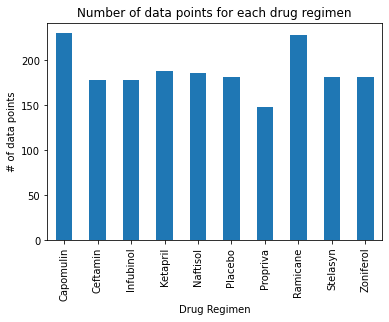

In [148]:
%matplotlib inline
drug_chart = tp_drug_df.plot.bar()

drug_chart.set_title("Number of data points for each drug regimen")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("# of data points")

Text(0, 0.5, '')

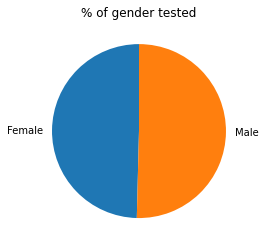

In [149]:
pie_chart = gender_percent_df.plot.pie(startangle = 90, title = "% of gender tested")
pie_chart.set_ylabel("")